In [1]:
from connect_four import MCTS

In [2]:
from connect_four.gameplay import game_play

Thinking...


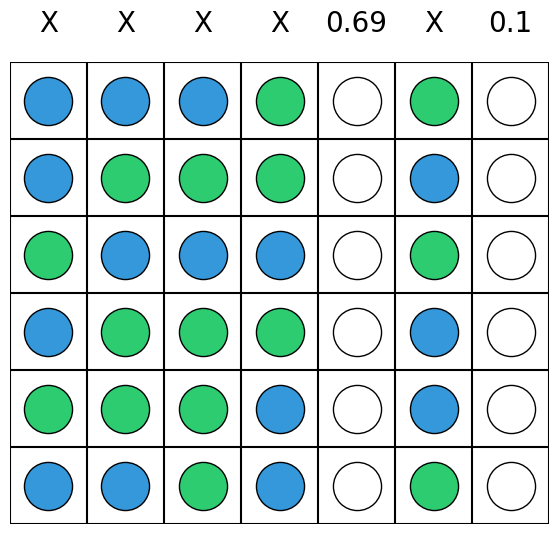

Thinking...


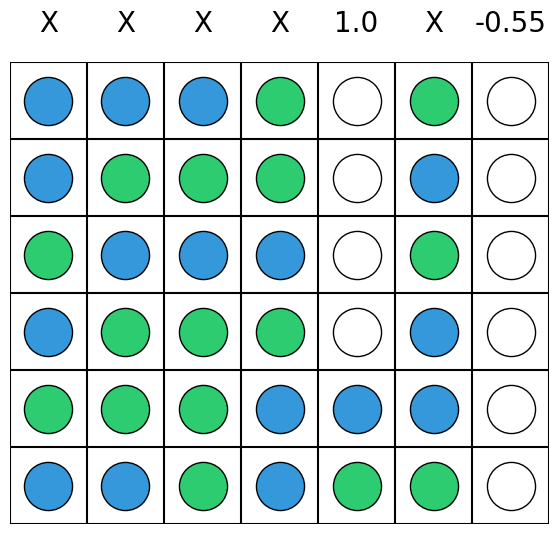

Green wins


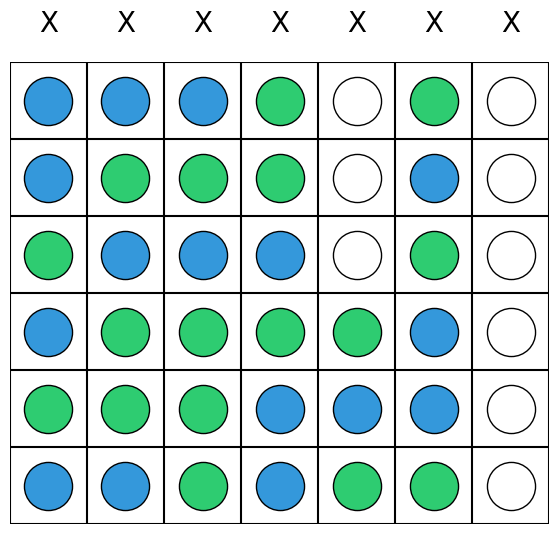

In [3]:
game_play()